### KSA308 

#### Week 1: Exploring the Southern Ocean with 2D data 

 Objectives: Introduce the physical context of the Southern Ocean relevant to understanding its role in the carbon cycle. The cold temperatures and large temperature gradients impacting CO2 solubility; the overturning circulation that connects the deep ocean carbon reservoir to the atmosphere; the seasonal cycle of sea ice production and melt, which contributes to the circulation and impacts air sea gas exchange and biological productivity;  nutrient distributions that reflect the combined influence of circulation and biology; biological productivity and HNLC nature of the SO; and finally an introduction to carbon parameters in the SO. 

 

Physics: 

Gray, Alison R. “The Four-Dimensional Carbon Cycle of the Southern Ocean.” Annual Review of Marine Science 16, no. 1 (2024): 163–90. https://doi.org/10.1146/annurev-marine-041923-104057. 


SST – map, contours  
composite from ocean color (Aqua-MODIS)

Winds – map? 

Ekman velocity map? 

Sea ice cover – winter and summer –  map 

Temperature, Salinity and Density sections from EN422 – sloping isopycnals (calc using gsw) 


BGC 

Nutrients (PO4, NO3, Si)– map and zonal section 
WOA
Nitrate: 
Nitrate - Statistical mean on 1° grid all decades
https://www.ncei.noaa.gov/thredds-ocean/ncss/grid/woa23/DATA/nitrate/netcdf/all/1.00/woa23_all_n00_01.nc/dataset.html



Chlorophyll – map  
seasonal climatology from ocean color (Aqua MODIS, L3, 2002-2024), 9km resolution

Carbon 

DIC – map and zonal section 

Alkalinity – map and zonal section 

pCO2 – map 

#### Import modules

In [ ]:
# install missing modules 
#conda install conda-forge::h5netcdf

#conda install conda-forge::cftime

SyntaxError: invalid syntax (3393262284.py, line 4)

In [2]:
conda install conda-forge::gsw

/home/aoetjens/miniconda3/lib/python3.11/site-packages/conda/base/context.py:211: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.9. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.0
    latest version: 25.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/aoetjens/miniconda3/envs/carpentries

  added / updated specs:
    - conda-forge::gsw


The following packages will be downloaded:

    package          

In [3]:
# import packages

import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import gsw

# set path to data files on local directory
path_data = '/home/aoetjens/PhD/teaching/KSA308/data/'

In [ ]:
# Sea Surface Temperature (SST)

## what is it, how is it measured
## data product: Oceancolour compilation/monthly climatology
## fronts in the Southern Ocean, combine with sea surface height and ice

# a) Download data from ocean color 

# https://oceandata.sci.gsfc.nasa.gov/l3/

# https://oceancolor.gsfc.nasa.gov/data/download_methods/?tab=download-methods-tab#netrc

# or this one (not climatology, but 3D data):
#https://data.marine.copernicus.eu/product/MULTIOBS_GLO_PHY_TSUV_3D_MYNRT_015_012/download?dataset=dataset-armor-3d-rep-monthly_202012

# Sea surface temperature:
# - Level 3, Aqua-MODIS whole mission composite, 9km, 


# b) store data in a local folder



# c) read data with xarray

#path_data =  'put in correct file path here'
file = glob.glob(path_data +'*sst.nc')[0]
ds = xr.open_dataset(file,engine='h5netcdf')
print('original shape: ', ds.dims)
# downsample data for faster plotting
sst = ds.sst.coarsen(lat=10, lon=10, boundary='trim').mean()
print(sst.shape)
ds.close()

original shape:  FrozenMappingWarningOnValuesAccess({'lat': 1440, 'lon': 8640, 'rgb': 3, 'eightbitcolor': 256})
(144, 864)


### Plotting data

In [46]:
# preparing the map 

def SouthPolarAxis(ax):
    theta = np.linspace(0, 2*np.pi, 100)
    map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])
    extent = [-180, 180, -90, -40]
    ax.set_extent(extent, ccrs.PlateCarree())
    ax.set_facecolor([0.95, 0.95, 0.95])
    ax.set_boundary(map_circle, transform=ax.transAxes)
    # add coastlines 
    ax.coastlines(resolution = "50m",zorder = 11, linewidth = 1, color='dimgrey')
    ax.add_feature(cft.LAND, color='silver', lw=0.3, zorder=10) #cfeature.COLORS['land_alt1']
    # add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='black', alpha=1, zorder=10)
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}

    return ax, gl

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_14818/4071455332.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.colorbar(sst_plot,fraction = 0.03, pad = 0.05, orientation='vertical').set_label(label ='SST [$^{\circ}$ C]',size=12)


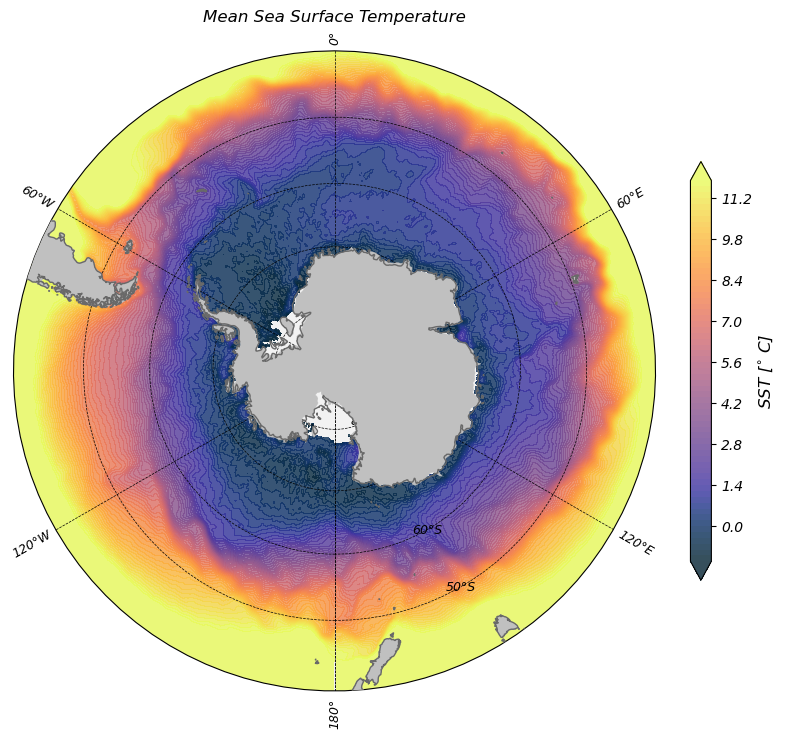

In [47]:
# initialize figure and axis
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax, gl = SouthPolarAxis(ax)

# plot sea surface temperature (SST)
levs =np.arange(-1.2,12,0.2)
sst = ds.sst.coarsen(lat=10, lon=10, boundary='trim').mean()
sst_plot = ax.contourf(sst.lon.data, sst.lat.data, sst.data, levs, transform=ccrs.PlateCarree(), extend='both', cmap = 'cmo.thermal',alpha = 0.8)
# add contour lines to identify fronts
#sst_con = ax.contour(sst.lon.data, sst.lat.data, sst.data,[0,5,7,10], colors = ['black'],linestyles=['-'],linewidths=[1], transform=ccrs.PlateCarree(), alpha=1)
#ax.clabel(sst_con, fmt='%2.0f', colors = 'black', fontsize=8)
# add 

plt.colorbar(sst_plot,fraction = 0.03, pad = 0.05, orientation='vertical').set_label(label ='SST [$^{\circ}$ C]',size=12)
plt.title('Mean Sea Surface Temperature', size=12)
plt.tight_layout()
plt.show()

### Nutrients

- Nitrate

In [89]:
# Nutrients

## what is it, how is it measured
## data product: Oceancolour compilation/monthly climatology
## fronts in the Southern Ocean, combine with sea surface height and ice

# a) Download data from World Oceaan Atlas (WOA)

# https://www.ncei.noaa.gov/access/world-ocean-atlas-2023/

# 1 degree, annual data


# b) store data in a local folder



# c) read data with xarray


# Nitrate
file = glob.glob(path_data +'woa23_all_n00_01.nc')[0]
print(file)
ds = xr.open_dataset(file,engine='scipy', decode_times=False)
print('original shape: ', ds.dims)
no3_avg = ds.isel(time=0).n_an
no3_samples = ds.isel(time=0).sel(depth=0, method='nearest').n_mn
ds.close()


# Phosphate
file = glob.glob(path_data +'woa23_all_p00_01.nc')[0]
print(file)
ds = xr.open_dataset(file,engine='scipy', decode_times=False)
print('original shape: ', ds.dims)
po4_avg = ds.isel(time=0).p_an
po4_samples = ds.isel(time=0).sel(depth=0, method='nearest').p_mn
ds.close()


file = glob.glob(path_data +'woa23_all_i00_01.nc')[0]
print(file)
ds = xr.open_dataset(file,engine='scipy', decode_times=False)
print('original shape: ', ds.dims)
si_avg = ds.isel(time=0).i_an
si_samples = ds.isel(time=0).sel(depth=0, method='nearest').i_mn
ds.close()


no3_avg
#  same for phosphate and silicate

/home/aoetjens/PhD/teaching/KSA308/data/woa23_all_n00_01.nc
original shape:  FrozenMappingWarningOnValuesAccess({'depth': 102, 'bounds_dim': 2, 'time': 1, 'lat': 61, 'lon': 360})
/home/aoetjens/PhD/teaching/KSA308/data/woa23_all_p00_01.nc
original shape:  FrozenMappingWarningOnValuesAccess({'depth': 102, 'bounds_dim': 2, 'time': 1, 'lat': 61, 'lon': 360})
/home/aoetjens/PhD/teaching/KSA308/data/woa23_all_i00_01.nc
original shape:  FrozenMappingWarningOnValuesAccess({'depth': 102, 'bounds_dim': 2, 'time': 1, 'lat': 61, 'lon': 360})


<xarray.DataArray 'n_an' (depth: 102, lat: 61, lon: 360)> Size: 9MB
[2239920 values with dtype=float32]
Coordinates:
  * depth    (depth) float32 408B 1.25 5.0 10.0 ... 5.3e+03 5.4e+03 5.475e+03
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 4B 3.894e+03
  * lat      (lat) float32 244B -89.5 -88.5 -87.5 -86.5 ... -31.5 -30.5 -29.5
Attributes:
    standard_name:  moles_of_nitrate_per_unit_mass_in_sea_water
    long_name:      Objectively analyzed mean fields for moles_of_nitrate_per...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          micromoles_per_kilogram

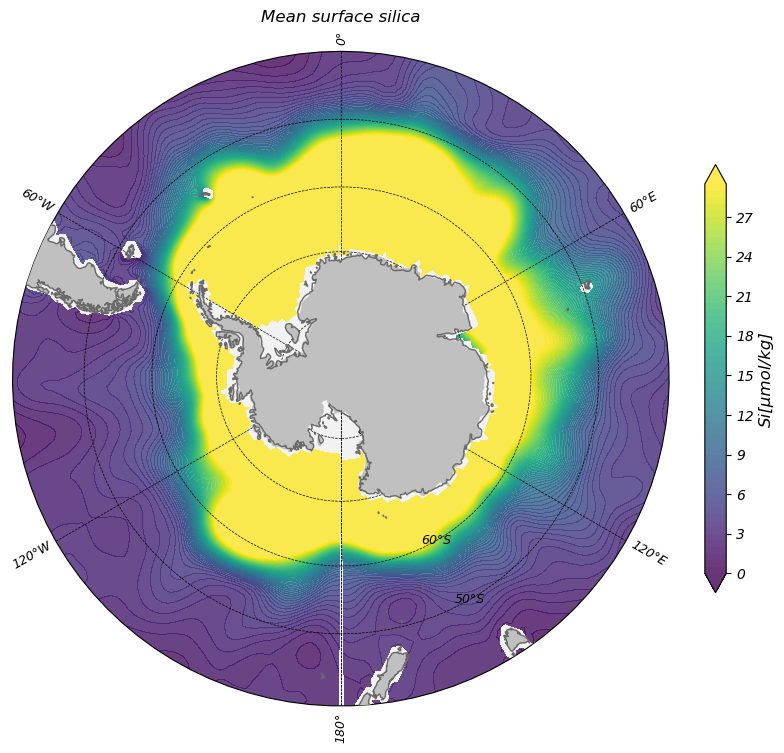

In [94]:


#no3_avg.sel(depth=10).plot(alpha=0.3)
#no3_samples.sel(depth=10).plot()
param = si_avg.sel(depth=0, method='nearest')
param_label = 'Si[µmol/kg]'  #'NO$_{3}$ [µmol/kg]'
param_title = 'Mean surface silica' #'Mean surface nitrate'

# initialize figure and axis
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax, gl = SouthPolarAxis(ax)

# plot nitrate (NO3)
levs =np.arange(0,30,0.5)

param_plot = ax.contourf(param.lon.data, param.lat.data, param.data, levs, transform=ccrs.PlateCarree(), extend='both', cmap = 'viridis',alpha = 0.8)
# add nitrate sampling points
# no3_samples.plot(ax=ax,transform=ccrs.PlateCarree(), vmin=0,vmax=30,add_colorbar=False)

# add contour lines to identify fronts (probably with ssh)
#sst_con = ax.contour(sst.lon.data, sst.lat.data, sst.data,[0,5,7,10], colors = ['black'],linestyles=['-'],linewidths=[1], transform=ccrs.PlateCarree(), alpha=1)
#ax.clabel(sst_con, fmt='%2.0f', colors = 'black', fontsize=8)
# add 

plt.colorbar(param_plot,fraction = 0.03, pad = 0.05, orientation='vertical').set_label(label = param_label,size=12)
plt.title(param_title, size=12)
plt.tight_layout()
plt.show()

In [4]:
#path_data =  'put in correct file path here'
file = glob.glob(path_data +'dataset-armor-3d-*.nc')[0]
ds = xr.open_dataset(file,engine='h5netcdf')
print('original shape: ', ds.dims)

ds

original shape:  FrozenMappingWarningOnValuesAccess({'time': 1, 'depth': 50, 'latitude': 209, 'longitude': 1440})


<xarray.Dataset> Size: 301MB
Dimensions:    (time: 1, depth: 50, latitude: 209, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 8B 2022-12-01
  * depth      (depth) float32 200B -0.0 5.0 10.0 15.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude   (latitude) float32 836B -82.12 -81.88 -81.62 ... -30.38 -30.12
  * longitude  (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables:
    so         (time, depth, latitude, longitude) float32 60MB ...
    to         (time, depth, latitude, longitude) float32 60MB ...
    ugo        (time, depth, latitude, longitude) float32 60MB ...
    vgo        (time, depth, latitude, longitude) float32 60MB ...
    zo         (time, depth, latitude, longitude) float32 60MB ...
Attributes:
    Conventions:       CF-1.11
    title:             ARMOR3D REP - TSHUVMld Global Ocean Observation-based ...
    institution:       CLS
    history:           1993-01-15 12:00:00 ARMOR3D REP - TSHUV Global Ocean O...
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  MULTIOBS_GLO_PHY_TSUV_3D_MYNRT_015_012
    subset:datasetId:  dataset-armor-3d-rep-monthly_202012
    subset:date:       2025-10-07T02:45:43.475Z

In [ ]:
# section plots


# compute density with gsw
# https://teos-10.github.io/GSW-Python/
# absolute/conservative temp/salinity
# gsw.density.rho(SA, CT, p)
#Calculates in-situ density from Absolute Salinity and Conservative Temperature, 
# using the computationally-efficient expression for specific volume in terms of SA, CT and p (Roquet et al., 2015).


# we have practical salinity and in-situ temperature and depth
# we need to convert practical salinity to absolute salinity and in-situ temperature to conservative temperature
# we also need pressure from depth

# we use gsw.p_from_z(z, lat) to get pressure from depth
# z is negative depth in m (i.e. -depth)
# lat is latitude in decimal degrees north
# we use gsw.SA_from_SP(SP, p, lon, lat) to
# convert practical salinity to absolute salinity
# SP is practical salinity in psu   
# p is sea pressure in dbar
# lon is longitude in decimal degrees east
# lat is latitude in decimal degrees north
# we use gsw.CT_from_t(SA, t, p) to convert in-situ temperature to conservative temperature
# SA is absolute salinity in g/kg
# t is in-situ temperature in deg C (ITS-90)
# p is sea pressure in dbar         




# plot different sections


<xarray.DataArray 'to' (time: 1, depth: 50, latitude: 209, longitude: 1440)> Size: 60MB
[15048000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 8B 2022-12-01
  * depth      (depth) float32 200B -0.0 5.0 10.0 15.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude   (latitude) float32 836B -82.12 -81.88 -81.62 ... -30.38 -30.12
  * longitude  (longitude) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Attributes:
    units:          degrees_C
    standard_name:  sea_water_temperature
    long_name:      Temperature
    unit_long:      degree Celsius

### Wind and Ekman transport

https://data.marine.copernicus.eu/product/MULTIOBS_GLO_PHY_MYNRT_015_003/download?dataset=cmems_obs-mob_glo_phy-cur_my_0.25deg_P1M-m_202411


monthly data, three years, create climatology, at surface and 15 m